In [1]:
import os
from collections import Counter  # python built-in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5TjwQOfvpfYmPlOiiKem")
project = rf.workspace("anpr-detection").project("anpr-detection")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ANPR-Detection-1 in yolov11:: 100%|██████████| 7204/7204 [00:02<00:00, 3570.46it/s]


In [7]:
! pip install ultralytics
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolo11s.pt')

# Train the model
model.train(data='/content/ANPR-Detection-1/data.yaml', epochs=15, imgsz=800, plots=True)


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/ANPR-Detection-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning /content/ANPR-Detection-1/train/labels.cache... 2501 images, 24 backgrounds, 0 corrupt: 100%|██████████| 2501/2501 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3153, len(boxes) = 3231. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/ANPR-Detection-1/valid/labels.cache... 766 images, 12 backgrounds, 0 corrupt: 100%|██████████| 766/766 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 925, len(boxes) = 946. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      7.09G      1.269      2.126      1.733         17        800: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.72it/s]

                   all        766        946      0.763      0.267      0.241     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      7.26G       1.24      1.101      1.719         13        800: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.15it/s]


                   all        766        946      0.745      0.328       0.21      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15       7.3G       1.22      1.062      1.717         13        800: 100%|██████████| 157/157 [01:29<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        766        946      0.938      0.343      0.387      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.24G      1.176     0.9983       1.66         12        800: 100%|██████████| 157/157 [01:27<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.76it/s]

                   all        766        946       0.92      0.381       0.41      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      7.28G      1.119     0.9098      1.624         19        800: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.15it/s]

                   all        766        946      0.929      0.397      0.417      0.258


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.27G      1.058     0.8372      1.734          5        800: 100%|██████████| 157/157 [01:28<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]

                   all        766        946      0.935      0.406      0.425      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.28G      1.011     0.7668      1.686          8        800: 100%|██████████| 157/157 [01:25<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.47it/s]

                   all        766        946      0.954      0.414      0.431      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      7.24G     0.9821     0.7143      1.645          5        800: 100%|██████████| 157/157 [01:25<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.75it/s]

                   all        766        946       0.96      0.412      0.431      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.28G     0.9496     0.6732      1.605          5        800: 100%|██████████| 157/157 [01:25<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]

                   all        766        946      0.938      0.421      0.438      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      7.27G     0.9423     0.6693      1.578          4        800: 100%|██████████| 157/157 [01:31<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]

                   all        766        946      0.955      0.438      0.445       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      7.27G      0.904     0.6094      1.535          5        800: 100%|██████████| 157/157 [01:25<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.96it/s]

                   all        766        946      0.954      0.443      0.448      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      7.24G     0.8795     0.5925      1.518         11        800: 100%|██████████| 157/157 [01:25<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]

                   all        766        946      0.963       0.44       0.45      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      7.29G     0.8386      0.564      1.471          7        800: 100%|██████████| 157/157 [01:30<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.06it/s]

                   all        766        946      0.959      0.444      0.452      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      7.27G     0.8343     0.5348      1.454          5        800: 100%|██████████| 157/157 [01:27<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.21it/s]

                   all        766        946      0.965      0.453       0.46      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      7.27G     0.8117     0.5165      1.437          7        800: 100%|██████████| 157/157 [01:31<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.15it/s]

                   all        766        946      0.961      0.452       0.46      0.341



15 epochs completed in 0.432 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 19.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.62it/s]


                   all        766        946      0.961      0.451       0.46       0.34
     0 0 0 1 0 1 1 0 1        738        925      0.923      0.903      0.913      0.679
                object         16         21          1          0     0.0069    0.00174
Speed: 0.5ms preprocess, 7.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b3eb3894410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

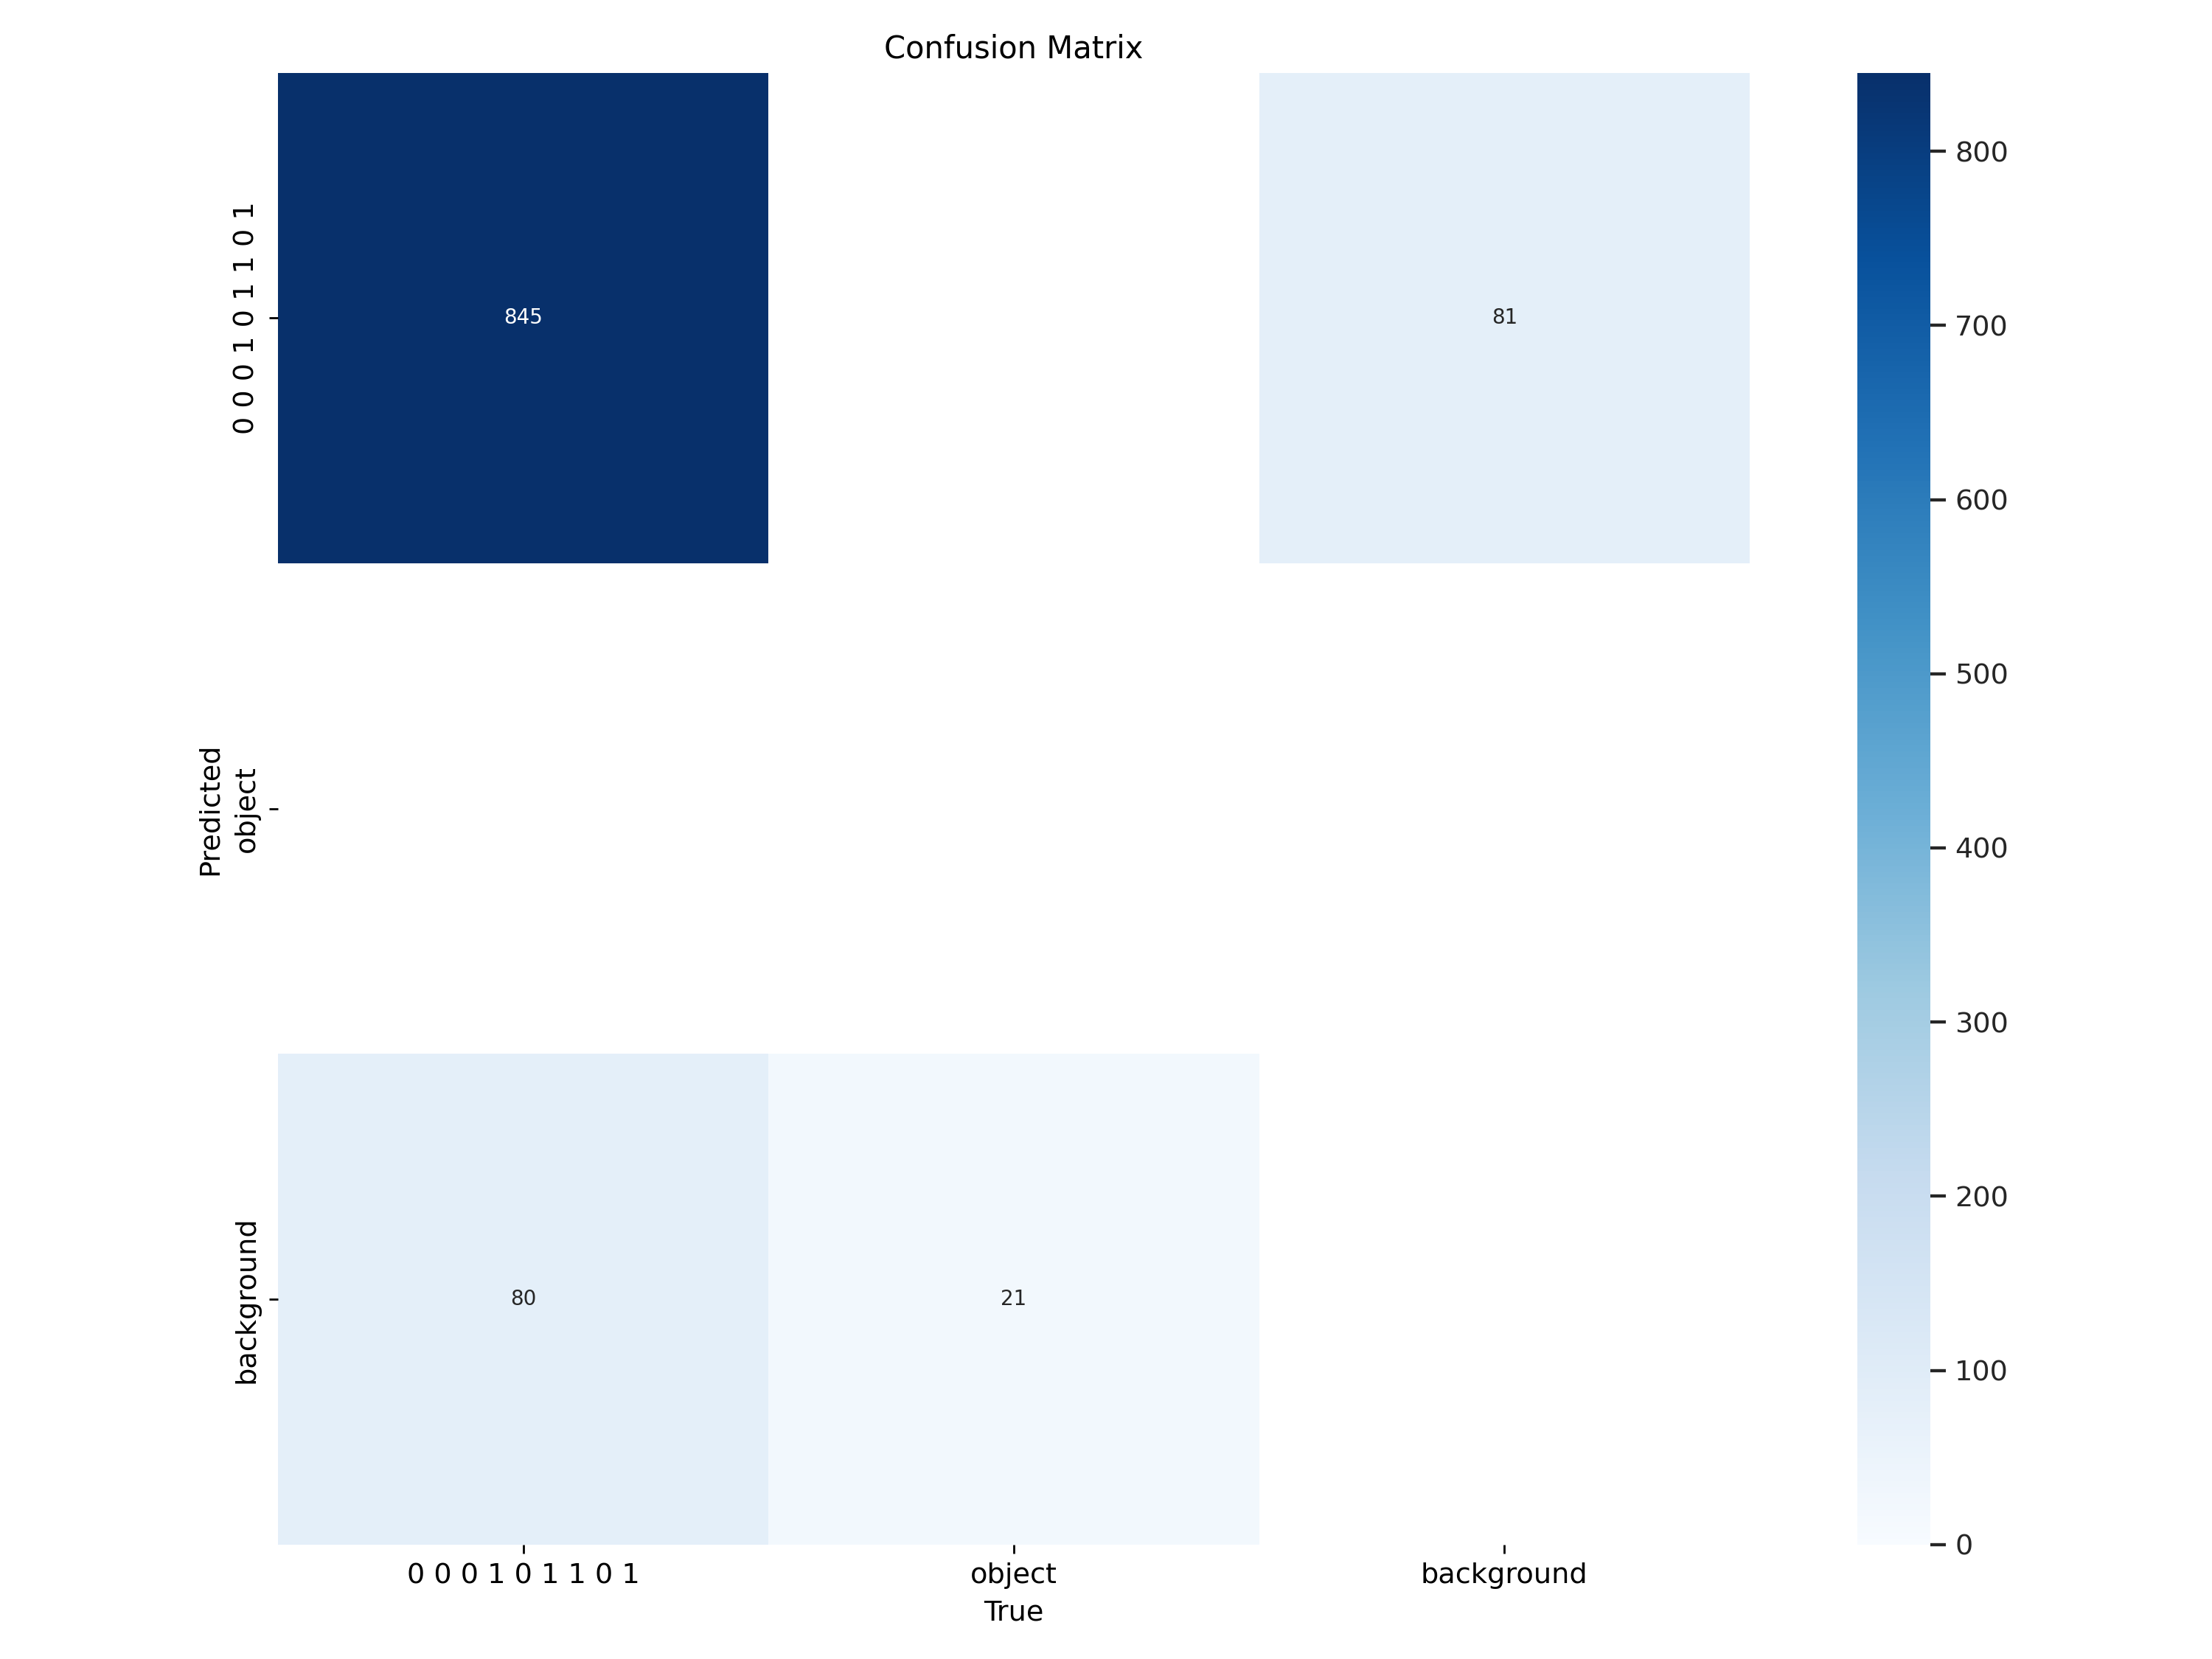

In [11]:
from IPython.display import Image

Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=600)

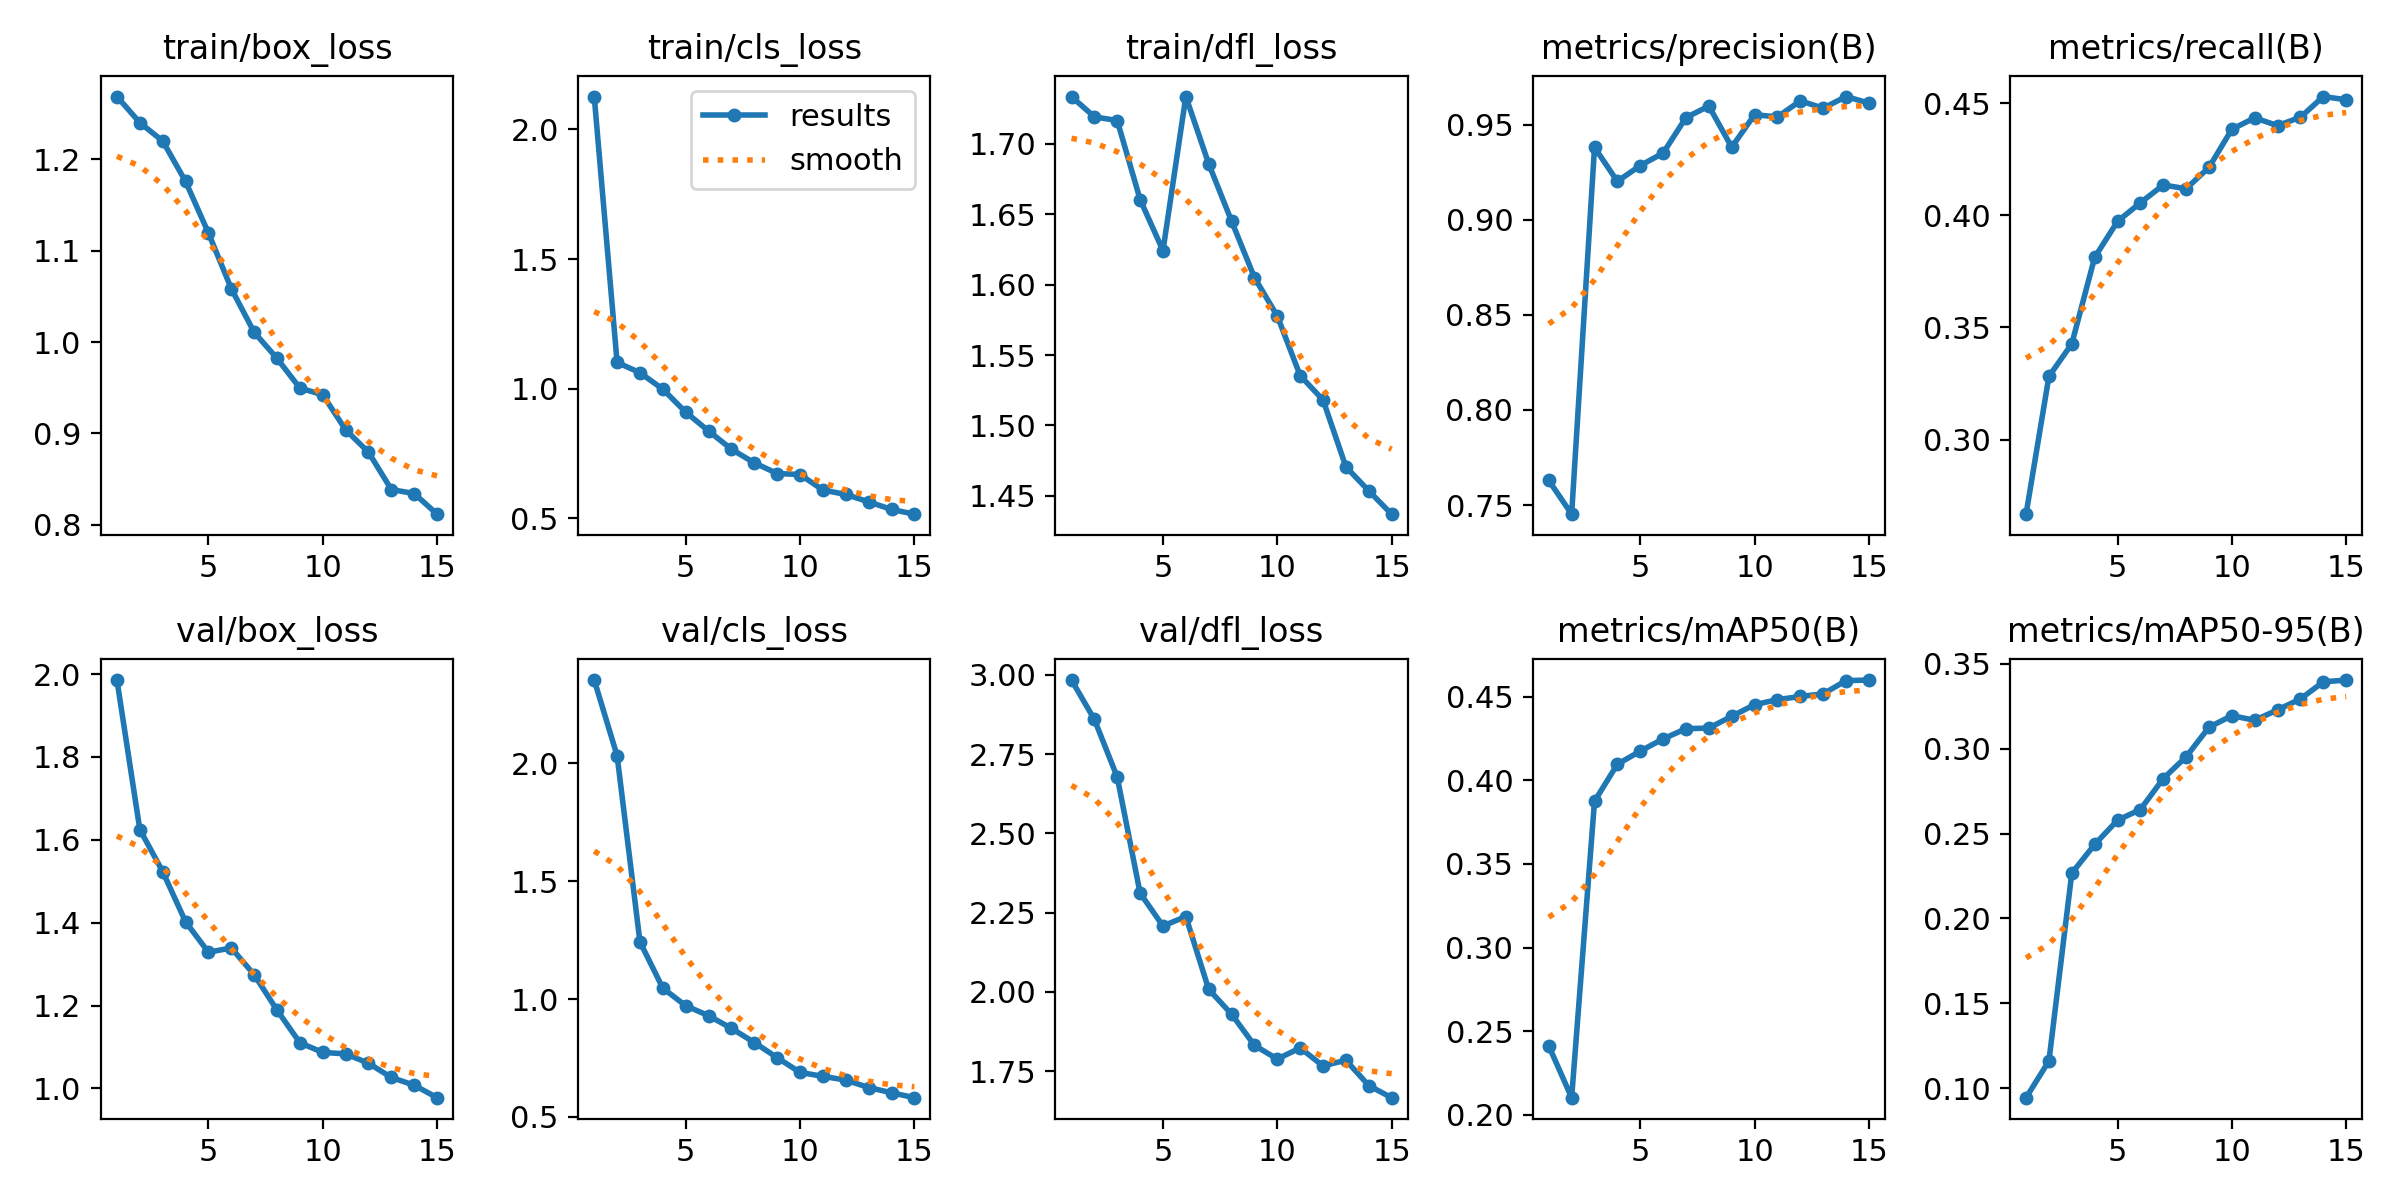

In [12]:
Image(filename='/content/runs/detect/train3/results.png', width=600)


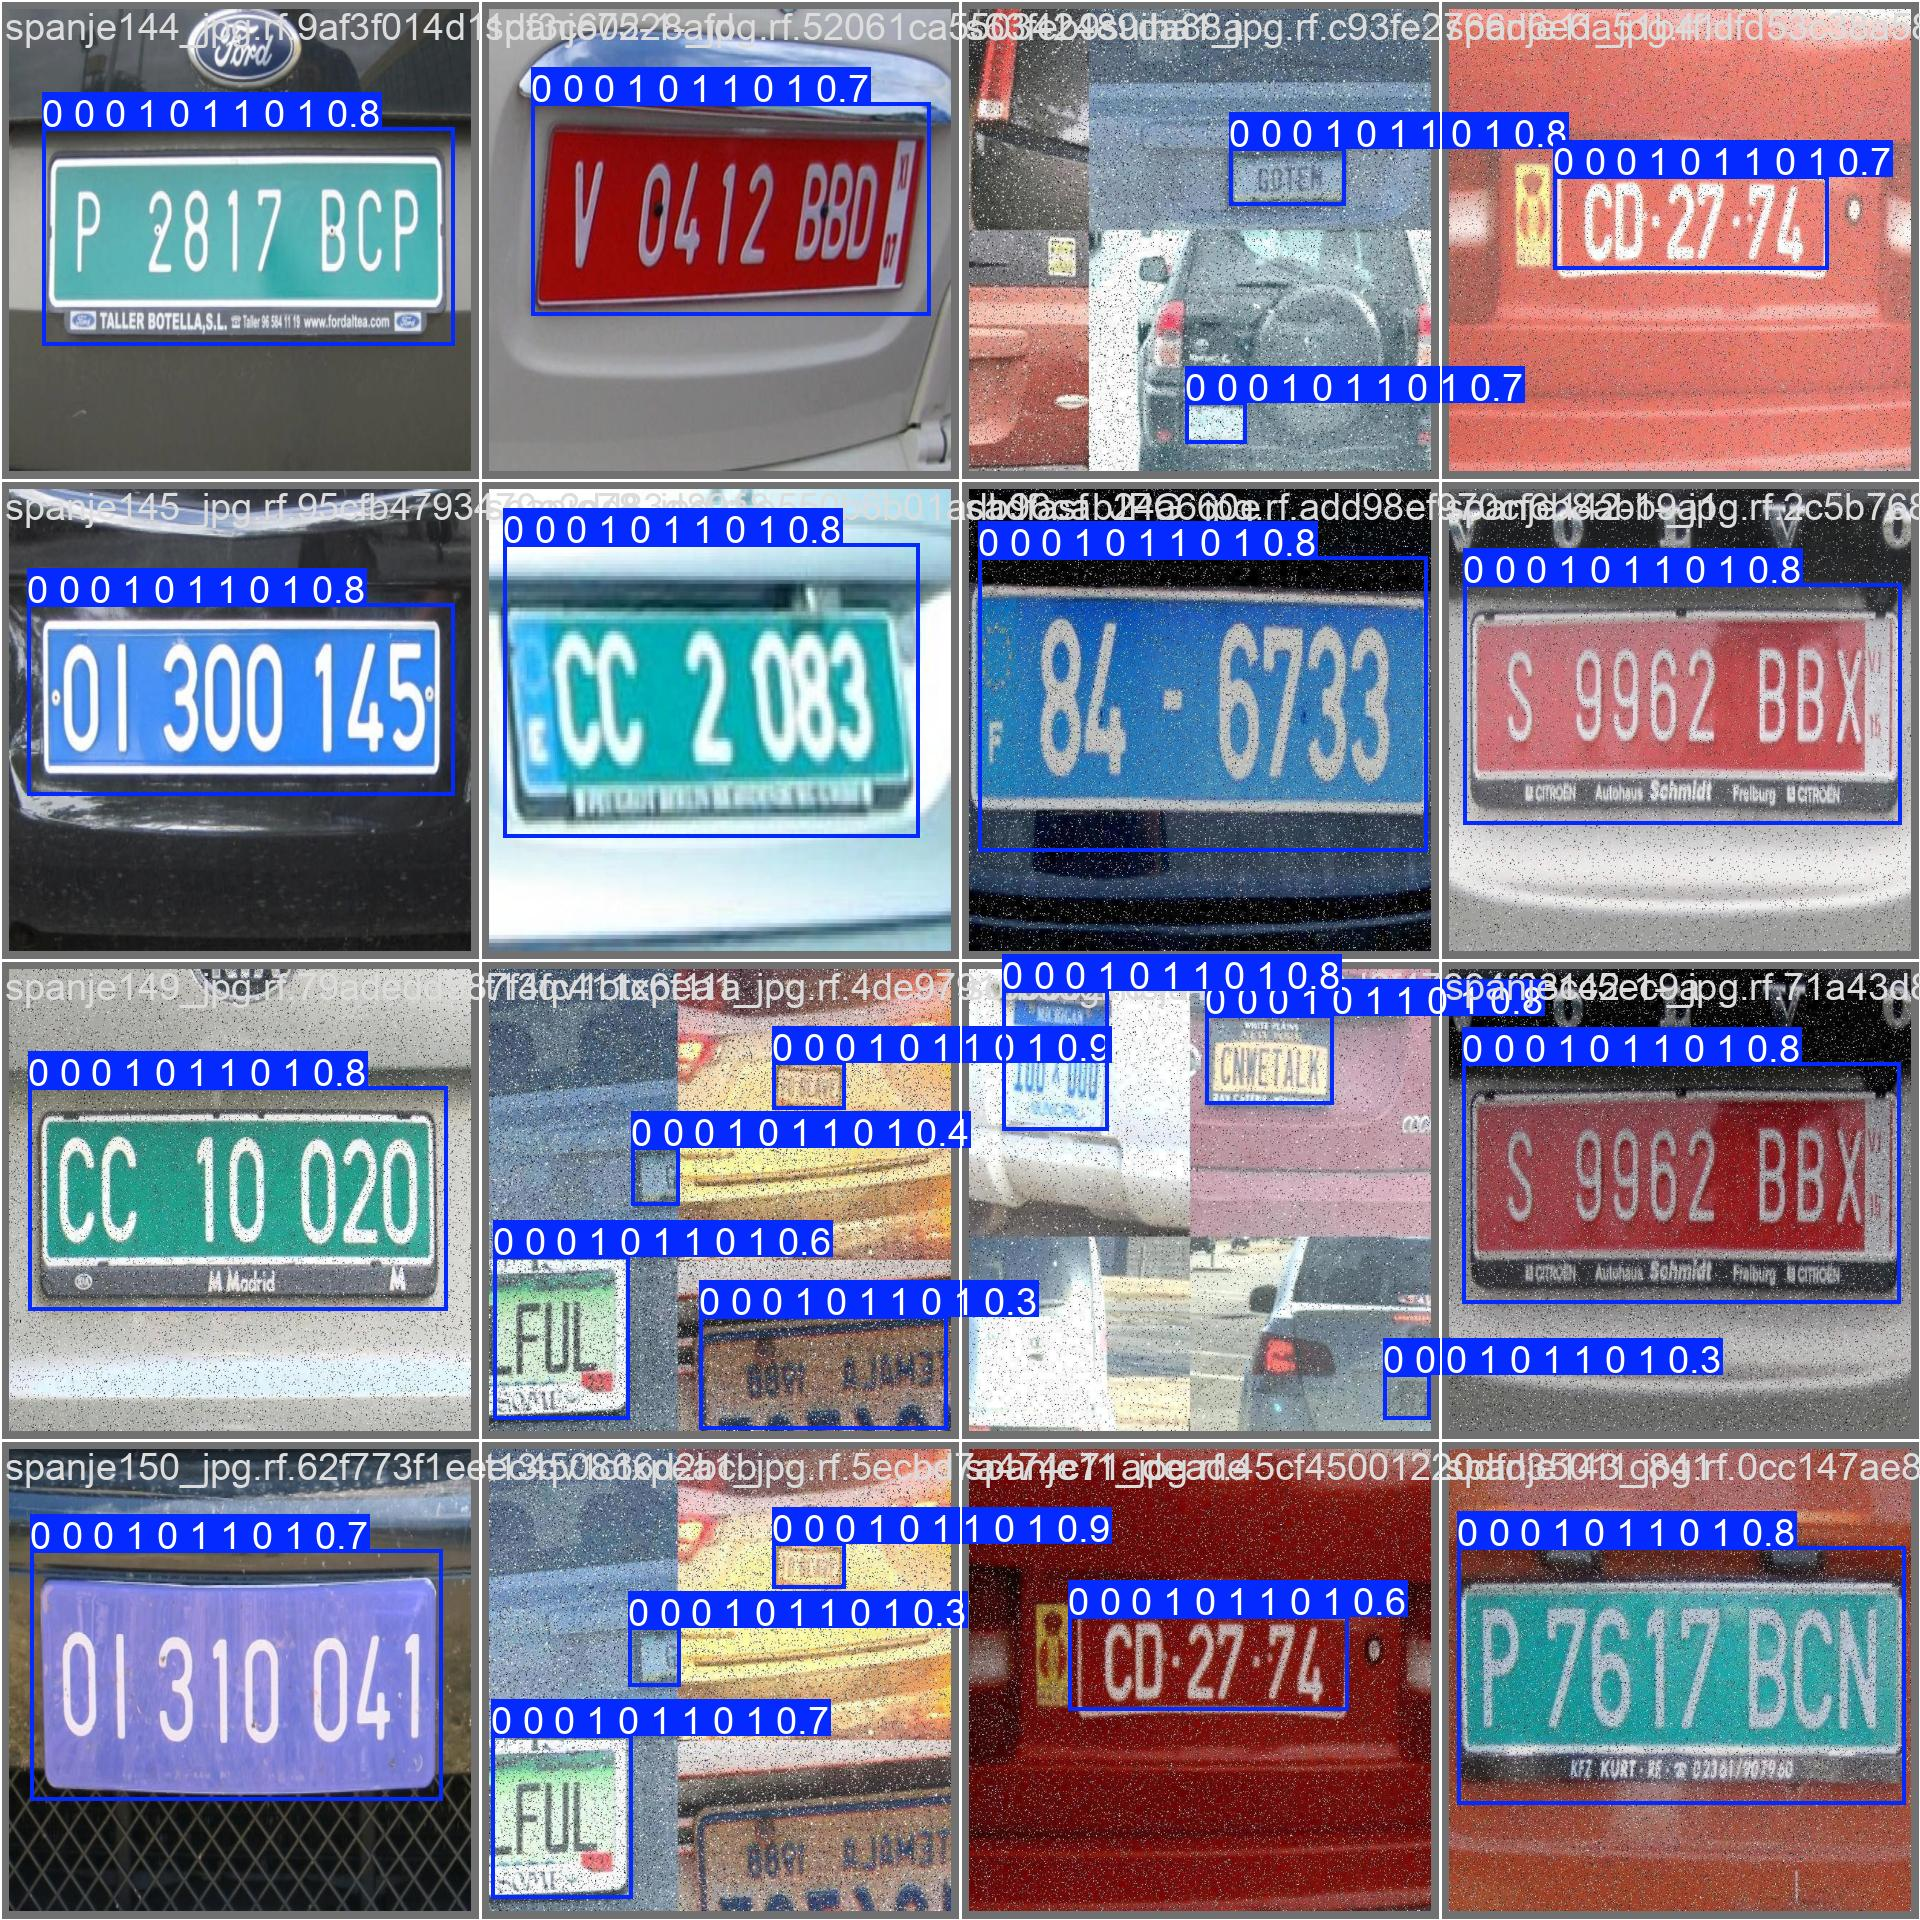

In [13]:
Image(filename='/content/runs/detect/train3/val_batch0_pred.jpg', width=600)


# Validate Custom Model

In [16]:
import os

# Set the locale environment variables
os.environ['LC_ALL'] = 'C.UTF-8'
os.environ['LANG'] = 'C.UTF-8'

# Now run your yolo command
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/ANPR-Detection-1/data.yaml'

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [19]:
import os
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Set the locale environment variables
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

# Now run your yolo command
!yolo task=detect mode=val model='/content/runs/detect/train3/weights/best.pt' data='/content/ANPR-Detection-1/data.yaml'

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/ANPR-Detection-1/valid/labels.cache... 766 images, 12 backgrounds, 0 corrupt: 100% 766/766 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 925, len(boxes) = 946. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:20<00:00,  2.39it/s]
                   all        766        946      0.959      0.454       0.46       0.34
     0 0 0 1 0 1 1 0 1        738        925      0.918      0.907      0.913      0.679
                object         16         21          1          0     0.0069    0.00173
Speed: 2.0ms preprocess, 13.9ms infere

In [24]:
!yolo task=detect mode=predict model='/content/runs/detect/train3/weights/best.pt' conf = 0.25  source='/content/ANPR-Detection-1/test/images' save= True

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/329 /content/ANPR-Detection-1/test/images/31de25424e74c9e93_jpg.rf.e78f8230e022380569a38bf190a9d80e.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 2/329 /content/ANPR-Detection-1/test/images/31nyka5gwhca1_jpg.rf.c3d9f3f3f2bdc6a618f44b9f587467af.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.3ms
image 3/329 /content/ANPR-Detection-1/test/images/34999e909748e2f7_jpg.rf.1c936570ba76d26bc7e837957849ce83.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 4/329 /content/ANPR-Detection-1/test/images/34c2f3e0c40914d62_jpg.rf.4350126597fc0ac33dbe57bdf1a4ae54.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 5/329 /content/ANPR-Detection-1/test/images/35ad7945eb83d60f_jpg.rf.e2ac80c3f6695b3b4d436d161ec93c04.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 6/329 /content/ANPR-Detection-1/test/images/36745e4446a1cc832_jpg.rf.1bf278e2a167c263944

In [26]:
!yolo task=detect mode=predict  model='/content/runs/detect/train/weights/best.pt' conf=0.25 source='/content/ANPR-Detection-1/test/images' save=True  data='/content/ANPR-Detection-1/data.yaml'



Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/329 /content/ANPR-Detection-1/test/images/31de25424e74c9e93_jpg.rf.e78f8230e022380569a38bf190a9d80e.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 2/329 /content/ANPR-Detection-1/test/images/31nyka5gwhca1_jpg.rf.c3d9f3f3f2bdc6a618f44b9f587467af.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 3/329 /content/ANPR-Detection-1/test/images/34999e909748e2f7_jpg.rf.1c936570ba76d26bc7e837957849ce83.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 4/329 /content/ANPR-Detection-1/test/images/34c2f3e0c40914d62_jpg.rf.4350126597fc0ac33dbe57bdf1a4ae54.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 5/329 /content/ANPR-Detection-1/test/images/35ad7945eb83d60f_jpg.rf.e2ac80c3f6695b3b4d436d161ec93c04.jpg: 800x800 1 0 0 0 1 0 1 1 0 1, 21.2ms
image 6/329 /content/ANPR-Detection-1/test/images/36745e4446a1cc832_jpg.rf.1bf278e2a167c263944

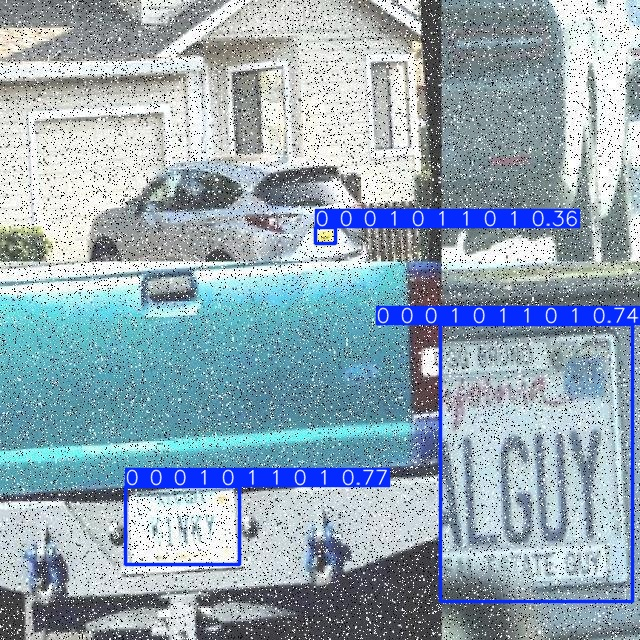

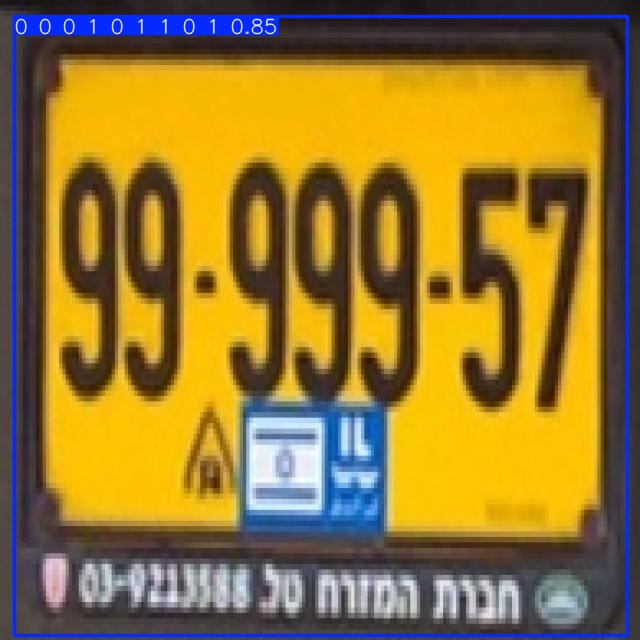

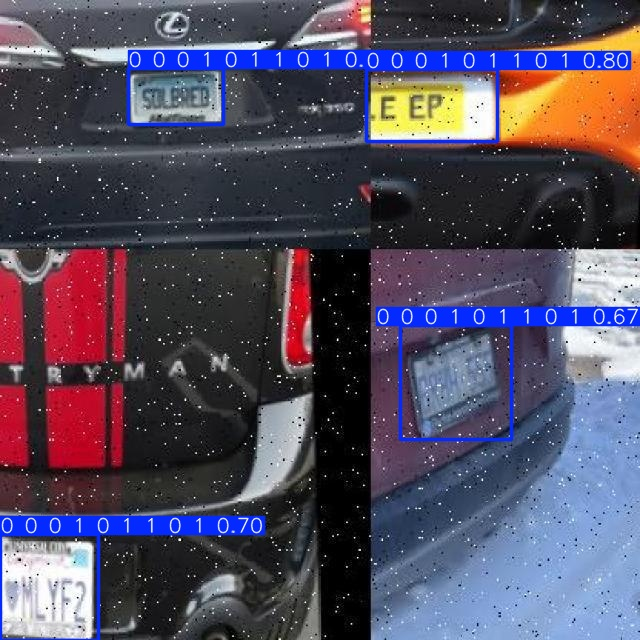

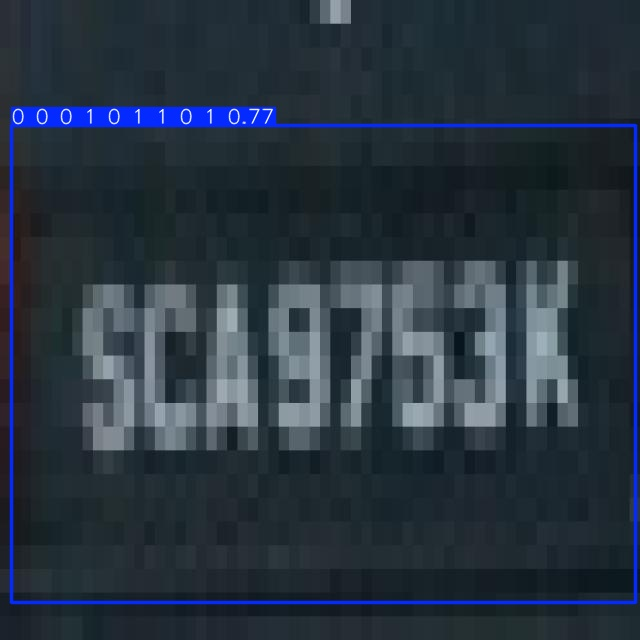

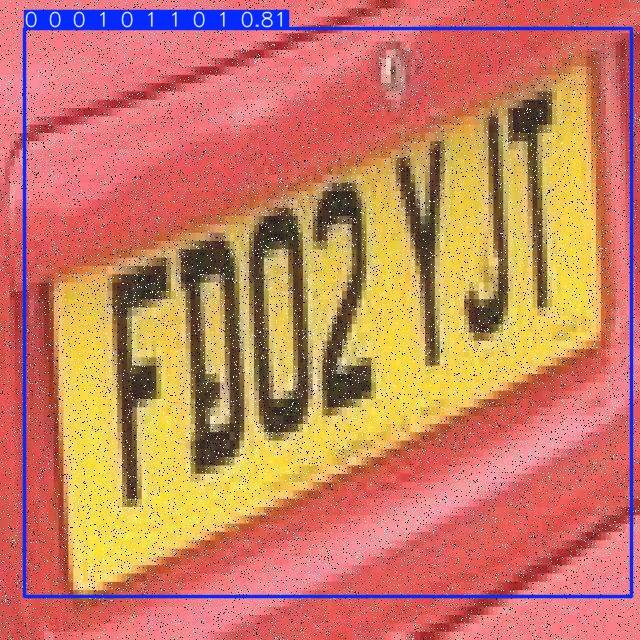

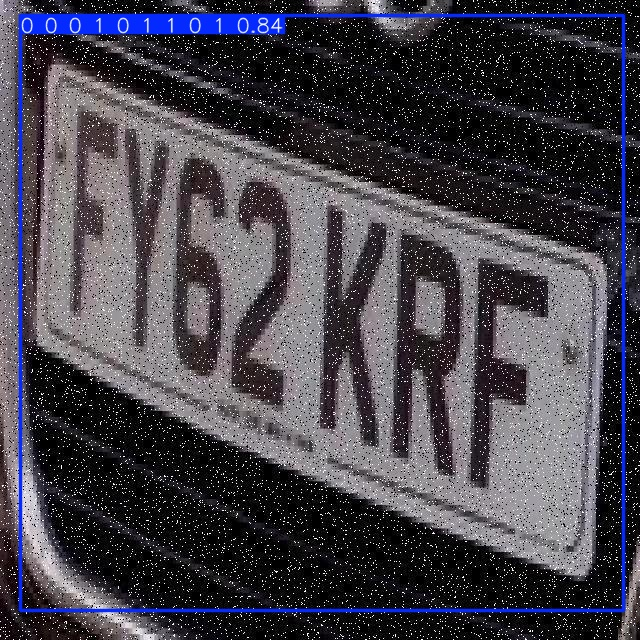

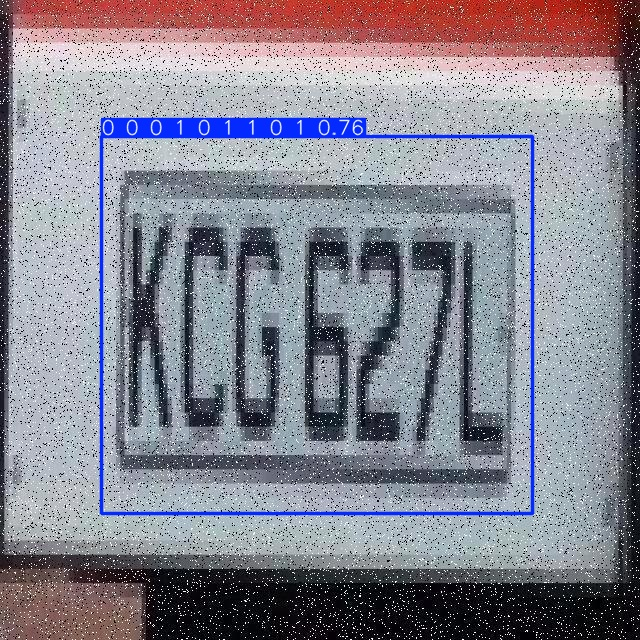

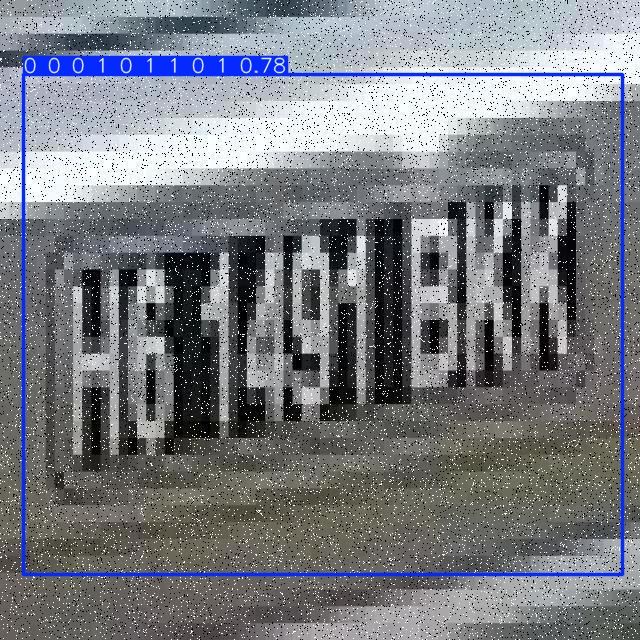

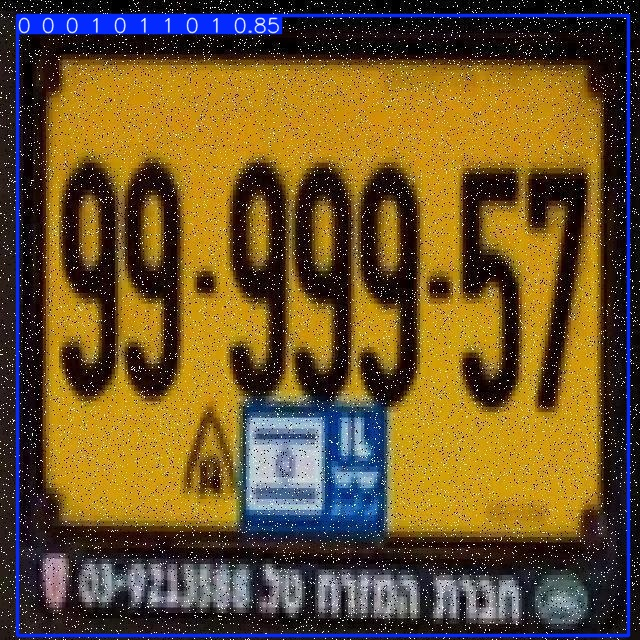

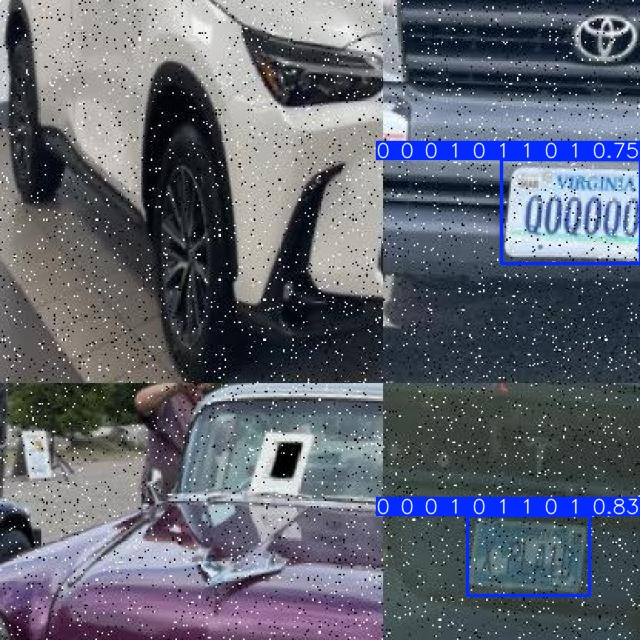

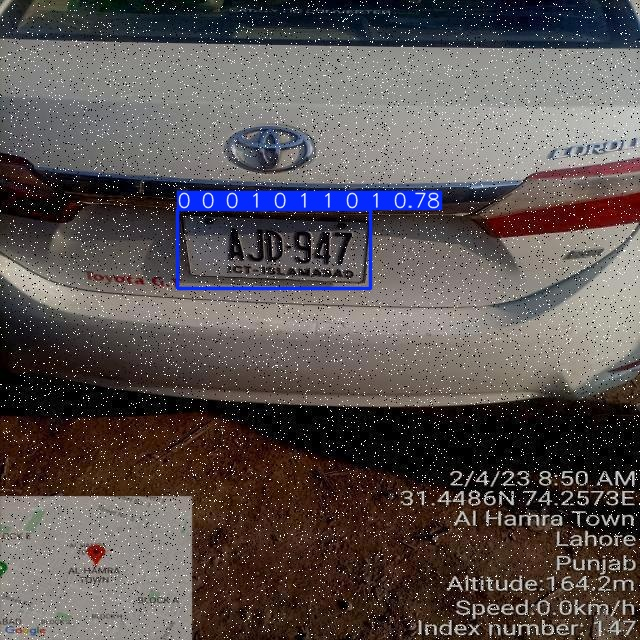

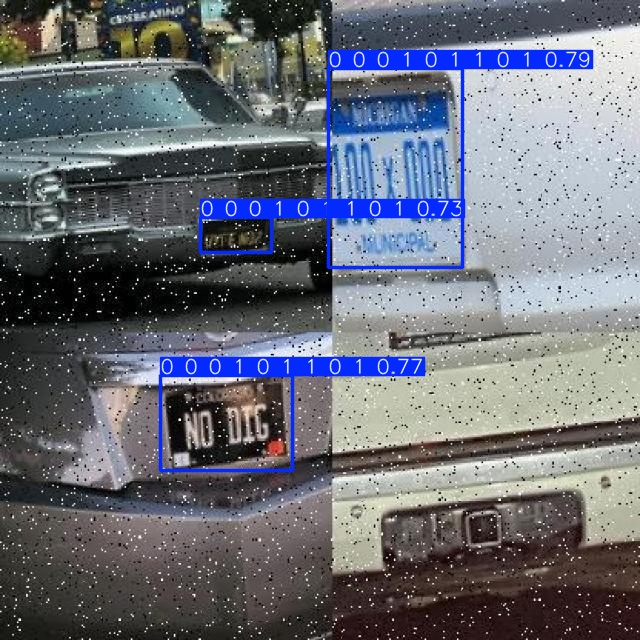

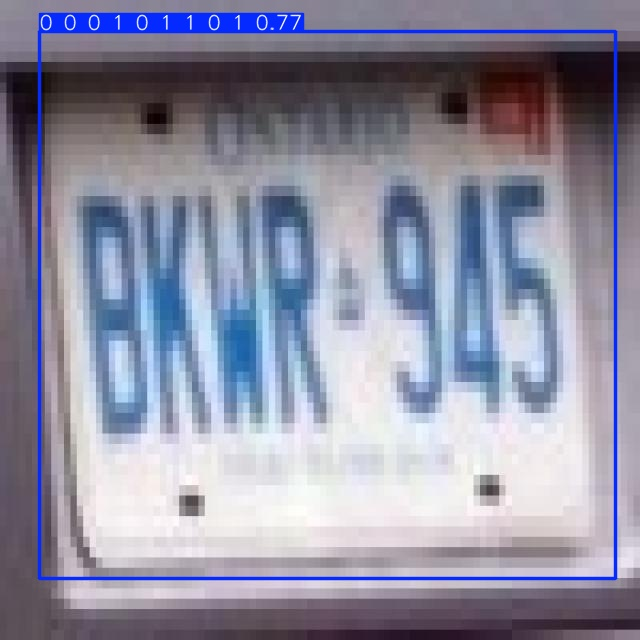

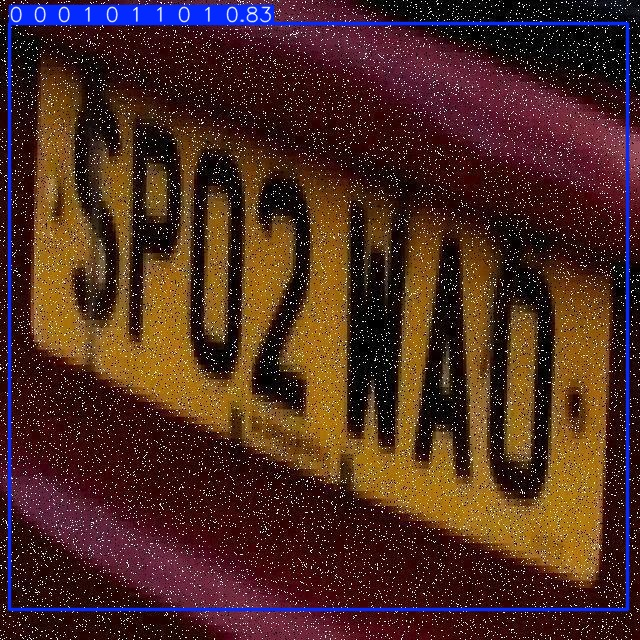

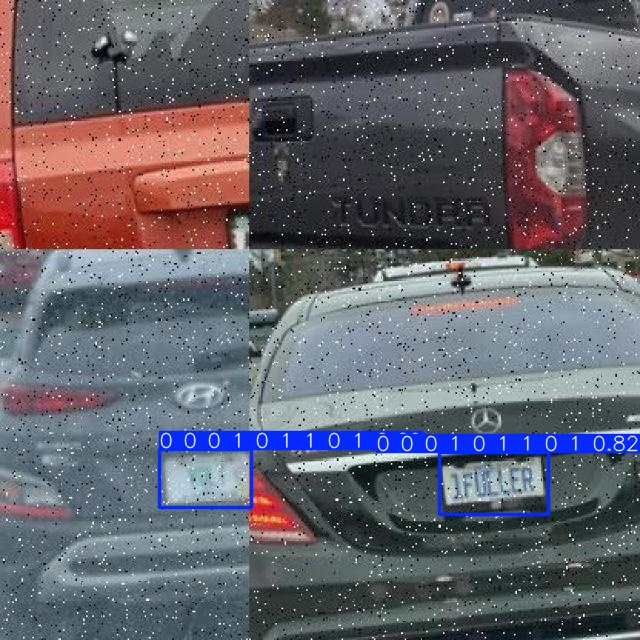

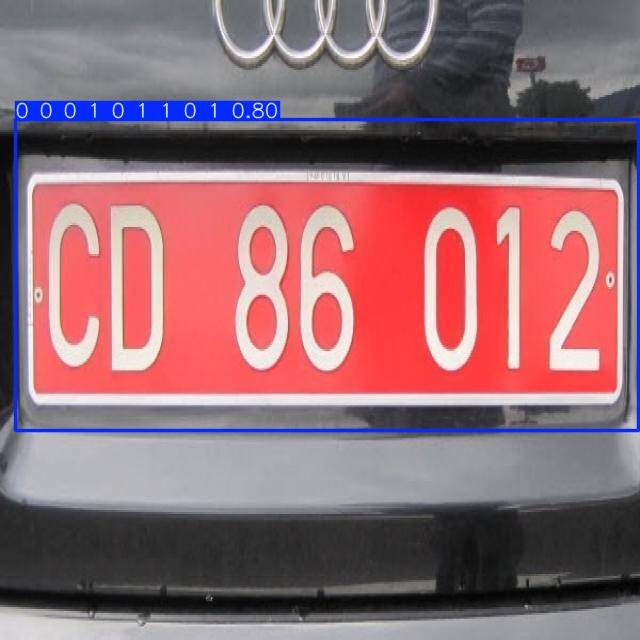

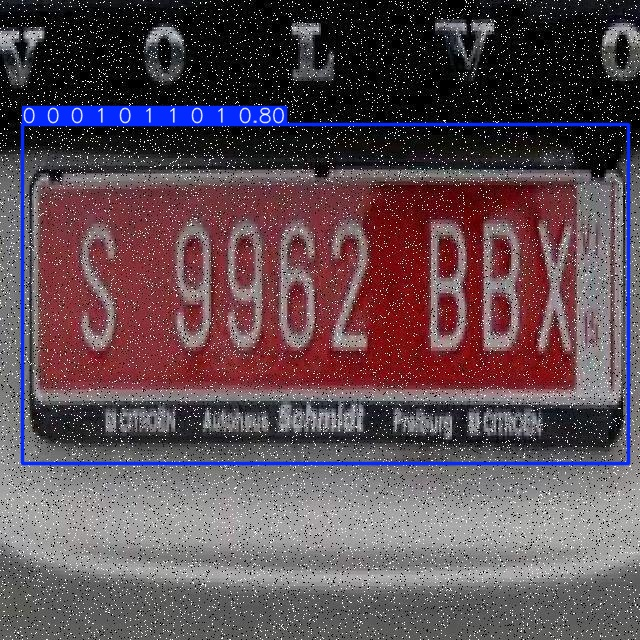

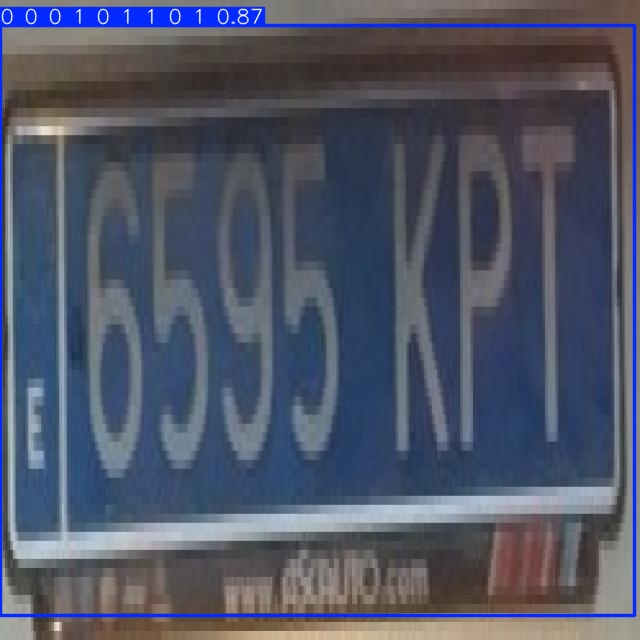

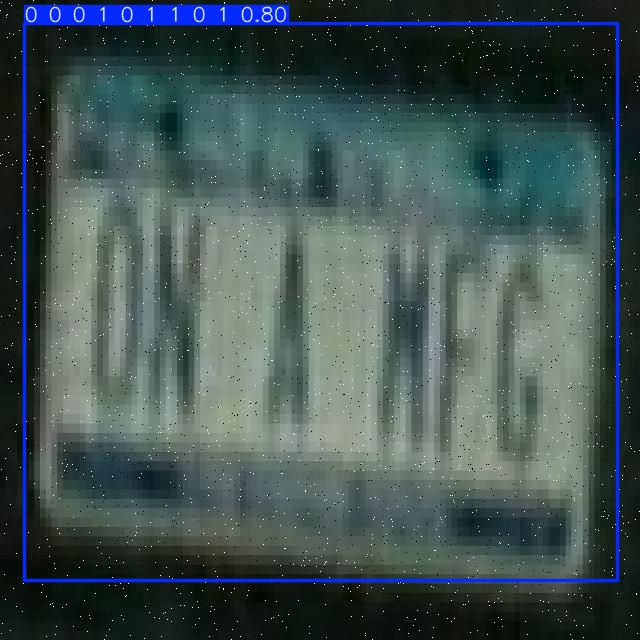

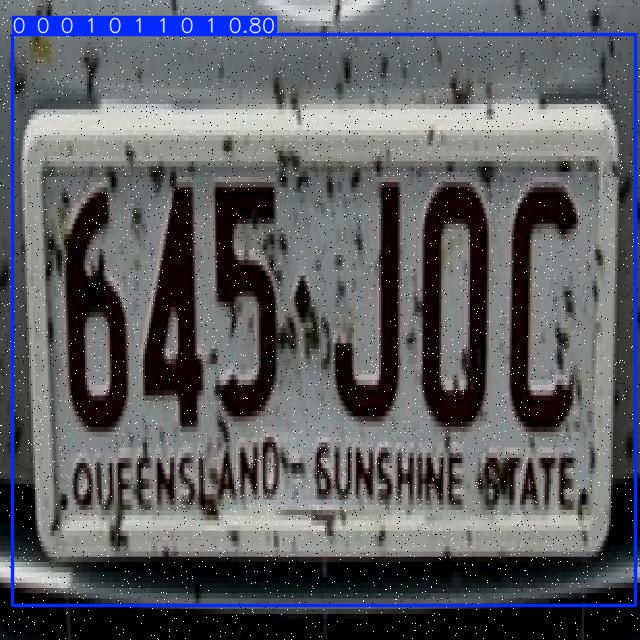

In [25]:
import glob
import os
from IPython.display import Image ,display

base_path = '/content/runs/detect/'

subfolder = [os.path.join(base_path, d) for d in os.listdir(base_path)
            if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

latest_folder = max(subfolder, key=os.path.getmtime)

image_path = glob.glob(f'{latest_folder}/*jpg')[:20]

# Display each image
for image_path in image_path:
    display(Image(filename=image_path, width=600))
    print("\n")

In [1]:
!yolo export model = /content/runs/detect/train3/weights/best.pt  format= tflite

/bin/bash: line 1: yolo: command not found
